In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import datetime
import math

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib

In [2]:
def is_nan_or_nat(value):
#   """Returns True if the value is NaN or NaT, False otherwise."""
    return np.isnat(value)

In [3]:
def convert_categorical_variables(combo_df):
#   """Converts categorical variables in a dataframe to normalized or indexed values.

#   Args:
#     combo_df: The Pandas dataframe to convert the categorical variables in.

#   Returns:
#     A Pandas dataframe with the categorical variables converted to normalized or indexed values.
#   """

    for column in combo_df:
        if not combo_df[column].dtype.name.startswith('int'):
            unique_values = combo_df[column].unique()

            if len(unique_values) <= 60:
                combo_df[column] = pd.Categorical(combo_df[column])
                combo_df[column] = combo_df[column].cat.codes
            else:
                combo_df[column] = pd.to_numeric(combo_df[column], errors='coerce')
                combo_df[column] = (combo_df[column] - combo_df[column].mean()) / combo_df[column].std()

    return combo_df

In [4]:
def is_date(value):
    try:
        datetime.datetime.strptime(value, '%Y-%m-%d')
        return True
    except ValueError:
        return False

In [5]:
# Read Excel file
df_sourcefile = pd.read_excel(
    'C:\\Users\\Michael\\Documents\\CASE STUDY CHURN PREDICTION\\EMPLOYEE MAIN FILE.xlsm', sheet_name=0)
print("Shape of dataframe is: {}".format(df_sourcefile.shape))

Shape of dataframe is: (2001, 20)


In [6]:
# Make a copy of the original sourcefile
df_HR1 = df_sourcefile.copy()

In [7]:
df_sourcefile = pd.read_excel(
    'C:\\Users\\Michael\\Documents\\CASE STUDY CHURN PREDICTION\\EMPLOYEE PERFORMANCE EVALS.xlsm', sheet_name=0)
print("Shape of dataframe is: {}".format(df_sourcefile.shape))

Shape of dataframe is: (8486, 3)


In [8]:
# Make a copy of the original sourcefile
df_HR2 = df_sourcefile.copy()

In [9]:
df_sourcefile = pd.read_excel(
    'C:\\Users\\Michael\\Documents\\CASE STUDY CHURN PREDICTION\\EMPLOYEE WORKPLACE SAT SCORES.xlsm', sheet_name=0)
print("Shape of dataframe is: {}".format(df_sourcefile.shape))

Shape of dataframe is: (8004, 4)


In [10]:
# Make a copy of the original sourcefile
df_HR3 = df_sourcefile.copy()

In [11]:
# df_HR1.head()

In [12]:
# df_HR2.head()

In [13]:
# df_HR3.head()

In [14]:
combo_df_step = df_HR1.merge(df_HR2, on='EmployeeId', how='left')

In [15]:
# combo_df_step.head(50)

In [16]:
combo_df= combo_df_step.merge(df_HR3, on='EmployeeId', how='left')

In [17]:
# Dataset columns
# combo_df.columns

In [18]:
# Dataset header
# combo_df.head(50)

In [19]:
combo_df["EmploymentEndDate"] = pd.to_datetime(combo_df['EmploymentEndDate'], errors='coerce').dt.strftime('%Y-%m-%d')

In [20]:
combo_df["EmploymentStartDate"] = pd.to_datetime(combo_df['EmploymentStartDate'], errors='coerce').dt.strftime('%Y-%m-%d')

In [21]:
combo_df["ReviewDate"] = pd.to_datetime(combo_df['ReviewDate'], errors='coerce').dt.strftime('%Y-%m-%d')

In [22]:
# print(combo_df["EmploymentEndDate"].unique())

In [23]:
# Columns datatypes and missign values
# combo_df.info()

In [24]:
combo_df["ATTRITION"] = np.where(combo_df["EmploymentEndDate"].isnull(), 0, 1)

In [25]:
print(combo_df["ATTRITION"].unique())

[0 1]


In [26]:
# Dataset header
# combo_df.head(50)

In [27]:
# Columns datatypes and missign values
# combo_df.info()

In [28]:
combo_df.describe()

,CommuteDistance,JobLevel,NumPreviousCompanies,NumYearsWorked,OvertimeDays,OvertimeHours,Salary,TrainingsAttended,WeeklyHoursBudgeted,YearOfBirth,PerformanceRating,ATTRITION
count,18737.000000,18737.000000,13534.000000,18737.000000,18737.000000,18737.000000,18737.000000,18737.000000,18737.0,18737.000000,17993.000000,18737.000000
mean,9.614399,2.385707,1.802719,19.071836,3.808400,9.060735,77525.585739,1.382986,40.0,1976.451406,3.302395,0.461867
std,4.052054,1.118785,1.452905,9.548427,4.857679,7.667441,35700.375550,1.051962,0.0,9.538575,0.838891,0.498557
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,22700.000000,-1.000000,40.0,1949.000000,1.000000,0.000000
25%,7.000000,2.000000,1.000000,12.000000,1.000000,4.000000,51700.000000,1.000000,40.0,1970.000000,3.000000,0.000000
50%,9.000000,2.000000,2.000000,19.000000,2.000000,7.000000,69500.000000,1.000000,40.0,1977.000000,3.000000,0.000000
75%,13.000000,3.000000,3.000000,26.000000,5.000000,12.000000,94700.000000,2.000000,40.0,1984.000000,4.000000,1.000000
max,25.000000,5.000000,10.000000,49.000000,57.000000,78.000000,258300.000000,8.000000,40.0,1995.000000,5.000000,1.000000


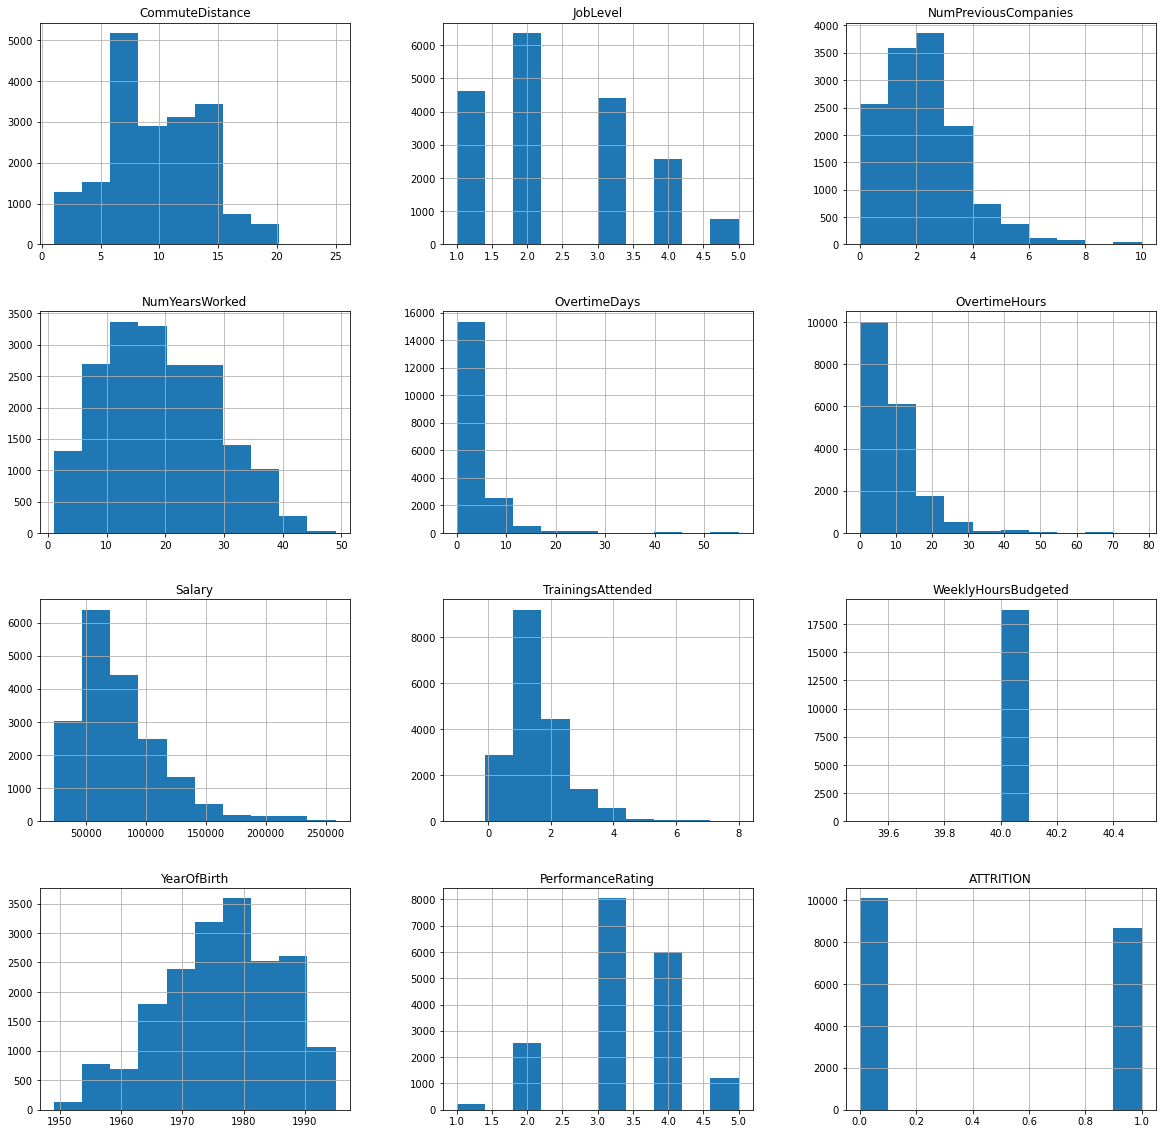

In [29]:
combo_df.hist(figsize=(20,20))
plt.show()

In [30]:
# normalized_df = normalize_non_numeric_values(combo_df) 
normalized_df = convert_categorical_variables(combo_df)

In [31]:
# Dataset header
# normalized_df.head()

In [32]:
normalized_df["EmploymentEndDate"] = normalized_df["EmploymentEndDate"].replace(np.nan,0)
normalized_df["EmploymentStartDate"] = normalized_df["EmploymentStartDate"].replace(np.nan,0)
normalized_df["ReviewDate"] = normalized_df["ReviewDate"].replace(np.nan,0)

In [33]:
# print(normalized_df['DegreeCompleted'].unique())

In [34]:
# print(normalized_df['DegreeField'].unique())

In [35]:
# print(normalized_df['Department'].unique())

In [36]:
# print(normalized_df['Gender'].unique())

In [37]:
# print(normalized_df['ATTRITION'].unique())

In [38]:
# Dataset header
# normalized_df.head(250)

In [39]:
# Create the target variable
target = combo_df["ATTRITION"]

In [40]:
# Drop the target variable from the features
features = combo_df.drop("ATTRITION", axis=1)

In [41]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

In [42]:
# Create the random forest classifier
clf = RandomForestClassifier(n_estimators=1000, random_state=42)

In [43]:
# Fit the model to the training data
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [44]:
# Predict the churn rate on the test data
y_pred = clf.predict(X_test)

In [45]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

In [46]:
print("Accuracy:", accuracy)

Accuracy: 1.0


In [47]:
# Print the most important features
feature_importances = clf.feature_importances_
sorted_features = sorted(zip(feature_importances, features.columns), key=lambda x: -x[0])
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

0.7009854444107109: EmploymentEndReason
0.1783074760505963: NumPreviousCompanies
0.020063238408498513: YearOfBirth
0.01729467610548117: NumYearsWorked
0.013554030971648959: Salary
0.010040521242983477: EmployeeId
0.009812055553104028: CommuteDistance
0.008304116918375525: OvertimeHours
0.007388698156655799: OvertimeDays
0.005322285386530246: TravelFrequency
0.004361296901580717: TrainingsAttended
0.004118311698395848: JobLevel
0.003880625741931433: Department
0.0037088337664747057: DegreeField
0.0031235921870913213: MaritalStatus
0.0028080370599837864: DegreeCompleted
0.0018127314176247672: Response
0.001436000389638855: Gender
0.0014272068373195424: PerformanceRating
0.0011463596893362027: QuestionNum
0.0011044611060379045: QuestionText
0.0: EmploymentEndDate
0.0: EmploymentStartDate
0.0: WeeklyHoursBudgeted
0.0: ReviewDate
